<a href="https://colab.research.google.com/github/matthewpblock/ml_classification_block/blob/main/block_classification_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Project: Classification Analysis - Matthew Block
- 11 November 2025

Welcome to the Block Classification Midterm project! This notebook documents the process of building and evaluating a machine learning model to solve a classification problem. As a midterm assignment, it covers the essential steps of a typical data science workflow, starting from data loading and exploratory data analysis, moving through feature engineering and preprocessing, and culminating in the training and evaluation of several classification models. The primary objective is to identify the best-performing model for this task and to demonstrate a comprehensive understanding of the classification pipeline.

In [24]:
!pip install ucimlrepo

In [25]:
import pandas as pd
import os
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import plot_tree

## Section 1. Import and Inspect the Data
### 1.1 Load the dataset and display the first 10 rows.

In [26]:
# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets
df_shrooms = mushroom.data

# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display the first 10 rows of the combined DataFrame
print(df.head(10))

# Create 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

#Save original data to data folder
df.to_csv('data/mushroom_data.csv', index=False)

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   
5         x           y         y       t    a               f            c   
6         b           s         w       t    a               f            c   
7         b           y         w       t    l               f            c   
8         x           y         w       t    p               f            c   
9         b           s         y       t    a               f            c   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          k           e  ...                      w  

In [27]:
# variable information for decoder ring
print(mushroom.variables)

                        name     role         type demographic  \
0                  poisonous   Target  Categorical        None   
1                  cap-shape  Feature  Categorical        None   
2                cap-surface  Feature  Categorical        None   
3                  cap-color  Feature       Binary        None   
4                    bruises  Feature  Categorical        None   
5                       odor  Feature  Categorical        None   
6            gill-attachment  Feature  Categorical        None   
7               gill-spacing  Feature  Categorical        None   
8                  gill-size  Feature  Categorical        None   
9                 gill-color  Feature  Categorical        None   
10               stalk-shape  Feature  Categorical        None   
11                stalk-root  Feature  Categorical        None   
12  stalk-surface-above-ring  Feature  Categorical        None   
13  stalk-surface-below-ring  Feature  Categorical        None   
14    stal

### 1.2 Check for missing values and display summary statistics.

In [28]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Display summary statistics
print("\nSummary statistics:")
df.info()

Missing values per column:
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

Summary statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------        

### Reflection 1:
- What do you notice about the dataset?
  - Stalk-root has a lot of missing values, so I probably won't look at that as a first option (although it's possible that it's salvageable)
- Are there any data issues?
  - Mainly the missing stalk-root values. Also the values have been encoded as with single letters that makes the dataset a smaller filesize, but makes it slightly less intuitive to work with.

## Section 2. Data Exploration and Preparation
### 2.1 Explore data patterns and distributions


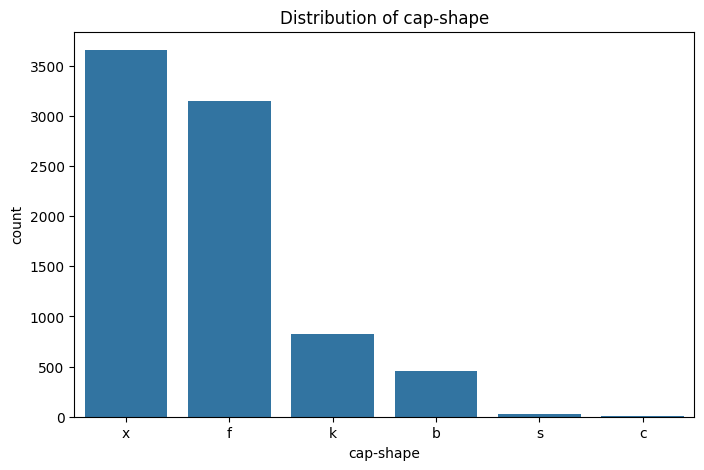

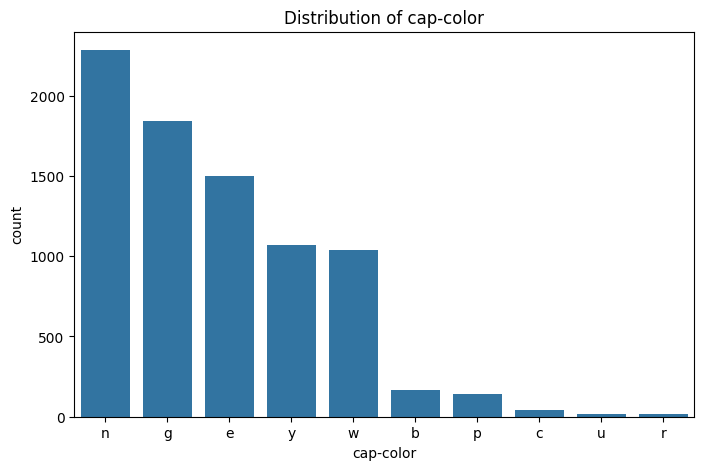

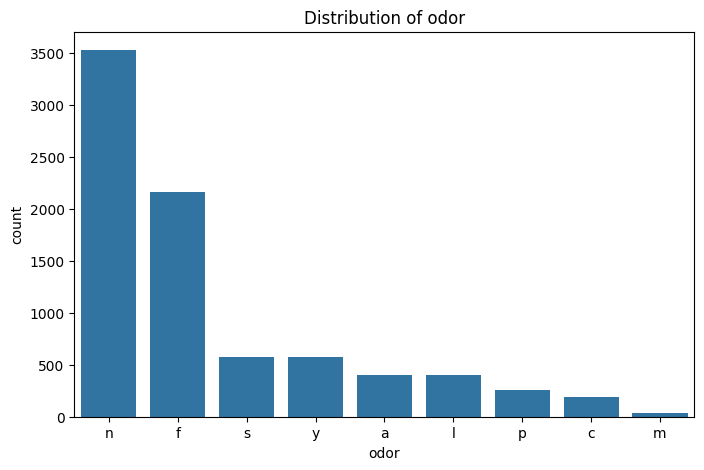

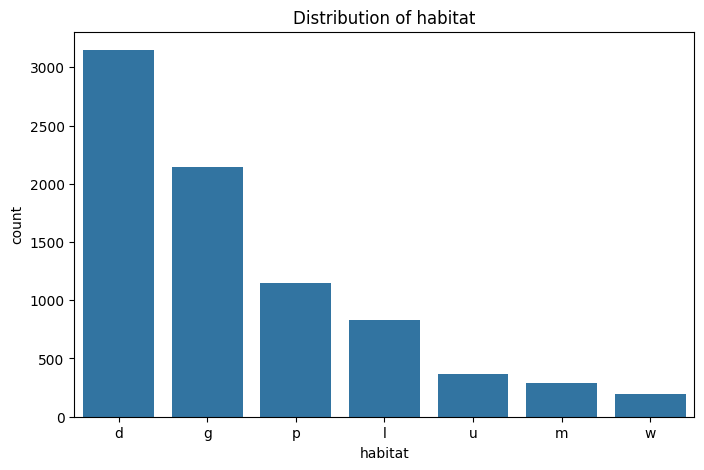

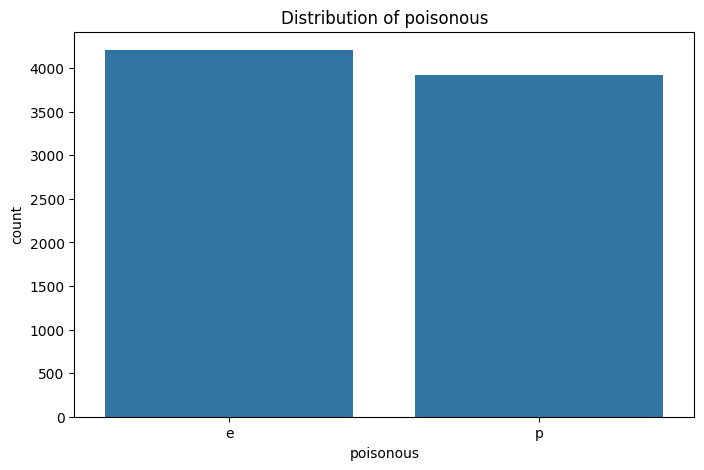

In [29]:
# Select a few categorical columns to plot
categorical_cols = ['cap-shape', 'cap-color', 'odor', 'habitat', 'poisonous']

# Create count plots for selected columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()


In [30]:
# Check correlations with 'poisonous' for each feature
for col in df.columns:
    if col != 'poisonous':
        print(f"\nCorrelation with poisonous for: {col}")
        display(df.groupby([col, 'poisonous']).size().unstack(fill_value=0))


Correlation with poisonous for: cap-shape


poisonous,e,p
cap-shape,,
b,404,48
c,0,4
f,1596,1556
k,228,600
s,32,0
x,1948,1708



Correlation with poisonous for: cap-surface


poisonous,e,p
cap-surface,,
f,1560,760
g,0,4
s,1144,1412
y,1504,1740



Correlation with poisonous for: cap-color


poisonous,e,p
cap-color,,
b,48,120
c,32,12
e,624,876
g,1032,808
n,1264,1020
p,56,88
r,16,0
u,16,0
w,720,320



Correlation with poisonous for: bruises


poisonous,e,p
bruises,,
f,1456,3292
t,2752,624



Correlation with poisonous for: odor


poisonous,e,p
odor,,
a,400,0
c,0,192
f,0,2160
l,400,0
m,0,36
n,3408,120
p,0,256
s,0,576
y,0,576



Correlation with poisonous for: gill-attachment


poisonous,e,p
gill-attachment,,
a,192,18
f,4016,3898



Correlation with poisonous for: gill-spacing


poisonous,e,p
gill-spacing,,
c,3008,3804
w,1200,112



Correlation with poisonous for: gill-size


poisonous,e,p
gill-size,,
b,3920,1692
n,288,2224



Correlation with poisonous for: gill-color


poisonous,e,p
gill-color,,
b,0,1728
e,96,0
g,248,504
h,204,528
k,344,64
n,936,112
o,64,0
p,852,640
r,0,24



Correlation with poisonous for: stalk-shape


poisonous,e,p
stalk-shape,,
e,1616,1900
t,2592,2016



Correlation with poisonous for: stalk-root


poisonous,e,p
stalk-root,,
b,1920,1856
c,512,44
e,864,256
r,192,0



Correlation with poisonous for: stalk-surface-above-ring


poisonous,e,p
stalk-surface-above-ring,,
f,408,144
k,144,2228
s,3640,1536
y,16,8



Correlation with poisonous for: stalk-surface-below-ring


poisonous,e,p
stalk-surface-below-ring,,
f,456,144
k,144,2160
s,3400,1536
y,208,76



Correlation with poisonous for: stalk-color-above-ring


poisonous,e,p
stalk-color-above-ring,,
b,0,432
c,0,36
e,96,0
g,576,0
n,16,432
o,192,0
p,576,1296
w,2752,1712
y,0,8



Correlation with poisonous for: stalk-color-below-ring


poisonous,e,p
stalk-color-below-ring,,
b,0,432
c,0,36
e,96,0
g,576,0
n,64,448
o,192,0
p,576,1296
w,2704,1680
y,0,24



Correlation with poisonous for: veil-type


poisonous,e,p
veil-type,,
p,4208,3916



Correlation with poisonous for: veil-color


poisonous,e,p
veil-color,,
n,96,0
o,96,0
w,4016,3908
y,0,8



Correlation with poisonous for: ring-number


poisonous,e,p
ring-number,,
n,0,36
o,3680,3808
t,528,72



Correlation with poisonous for: ring-type


poisonous,e,p
ring-type,,
e,1008,1768
f,48,0
l,0,1296
n,0,36
p,3152,816



Correlation with poisonous for: spore-print-color


poisonous,e,p
spore-print-color,,
b,48,0
h,48,1584
k,1648,224
n,1744,224
o,48,0
r,0,72
u,48,0
w,576,1812
y,48,0



Correlation with poisonous for: population


poisonous,e,p
population,,
a,384,0
c,288,52
n,400,0
s,880,368
v,1192,2848
y,1064,648



Correlation with poisonous for: habitat


poisonous,e,p
habitat,,
d,1880,1268
g,1408,740
l,240,592
m,256,36
p,136,1008
u,96,272
w,192,0


### 2.2 Handle missing values and clean data
- Impute or drop missing values (as applicable).
- Remove or transform outliers (as applicable).
- Convert categorical data to numerical format using encoding (as applicable).


In [31]:
# Handle missing values in 'stalk-root' by encoding them as a separate category
df['stalk-root'] = df['stalk-root'].fillna('missing')

# Create a copy of the DataFrame to store label encoded values
df_encoded = df.copy()

# Convert categorical data to numerical format using Label Encoding
# Iterate over each column in the DataFrame
for column in df_encoded.columns:
    # Check if the column is of object type (categorical)
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])

# Display the first 5 rows of the encoded DataFrame
print(df_encoded.head())

   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7     

### 2.3 Feature selection and engineering
- Create new features (as applicable).
- Transform or combine existing features to improve model performance (as applicable).
- Scale or normalize data (as applicable).


In [32]:
# Identify all columns containing 'color' in their name from the encoded DataFrame
color_features = [col for col in df_encoded.columns if 'color' in col]

# Exclude the target variable 'poisonous' if it was accidentally included
if 'poisonous' in color_features:
    color_features.remove('poisonous')

print(f"Color features selected for engineering: {color_features}")

# Determine the maximum number of digits needed for padding.
# LabelEncoder assigns values from 0 to n-1. So max value is n-1.
# Max unique categories for 'gill-color' is 12 (values 0-11), requiring 2 digits.
max_label_value = df_encoded[color_features].max().max() # Find the max label across all color columns
padding_width = len(str(max_label_value)) # Determine padding width based on max label

# Create a new feature by combining the 'color' features
# Convert each feature's label-encoded value to a padded string and concatenate
df_encoded['combined_color_feature'] = df_encoded[color_features].astype(str).apply(
    lambda x: ''.join(x.str.zfill(padding_width)), axis=1
).astype(int)

print("\nFirst 5 rows with the new 'combined_color_feature':")
print(df_encoded[['combined_color_feature'] + color_features].head())

#Save transformed data to data folder
df.to_csv('data/mushroom_data_transformed.csv', index=False)

Color features selected for engineering: ['cap-color', 'gill-color', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'spore-print-color']

First 5 rows with the new 'combined_color_feature':
   combined_color_feature  cap-color  gill-color  stalk-color-above-ring  \
0             40407070202          4           4                       7   
1             90407070203          9           4                       7   
2             80507070203          8           5                       7   
3             80507070202          8           5                       7   
4             30407070203          3           4                       7   

   stalk-color-below-ring  veil-color  spore-print-color  
0                       7           2                  2  
1                       7           2                  3  
2                       7           2                  3  
3                       7           2                  2  
4                       7           2  

### Reflection 2:
- What patterns or anomalies do you see?
  - Other than one feature with some missing values, the data is pretty clean with no anomalies.
- Do any features stand out?
  - There's a few features that have several zeroes in each column when comparing to 'poisonous', especially odor and gill-color followed by other color-related fields.
- What preprocessing steps were necessary to clean and improve the data?
  - We treated the missing values as a value in itself, encoded the data as numbers instead of letters, and reduced the color features to a single dimension.
- Did you create or modify any features to improve performance?
  - Yes. In order to reduce all of the color features down to one dimension, I created a combined_color_feature.

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target

- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
  - combined_color_feature
  - odor
- Select a target variable (as applicable)
    - poisonous
- Justify your selection with reasoning.
  - The number one question when it comes to mushrooms is "Can I eat it?"
  - The input features selected showed particular promise in the correlation comparion review (highlighted earlier). While gill-color looked like the strongest color indicator, several color-based features looked useful so I wanted to reduce them to one dimension.

### 3.2 Define X and y
- Assign input features to X
- Assign target variable to y (as applicable)

In [33]:
# Assign input features to X
X = df_encoded[['combined_color_feature', 'odor']]

# Assign target variable to y
y = df_encoded['poisonous']

print("X head:")
print(X.head())
print("\ny head:")
print(y.head())

X head:
   combined_color_feature  odor
0             40407070202     6
1             90407070203     0
2             80507070203     3
3             80507070202     6
4             30407070203     5

y head:
0    1
1    0
2    0
3    1
4    0
Name: poisonous, dtype: int64


### Reflection 3:
- Why did you choose these features?
  - As stated above, identifying edibility is useful and color and odor both appear to have good correlation to poisonousness.
- How might they impact predictions or accuracy?
  - Hopefully the combination of odor and color features has a gestalt effect that is helps us predict better than any of the individual features on their own.

## Section 4. Train a Model
### 4.1 Split the data into training and test sets using train_test_split

In [34]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (6499, 2)
Shape of X_test: (1625, 2)
Shape of y_train: (6499,)
Shape of y_test: (1625,)


### 4.2 Train model using Scikit-Learn model.fit() method.

In [35]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


### 4.3 Evalulate performance

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions made on the test set. First 10 predictions:")
print(y_pred[:10])

Predictions made on the test set. First 10 predictions:
[0 0 0 0 0 0 0 0 0 0]


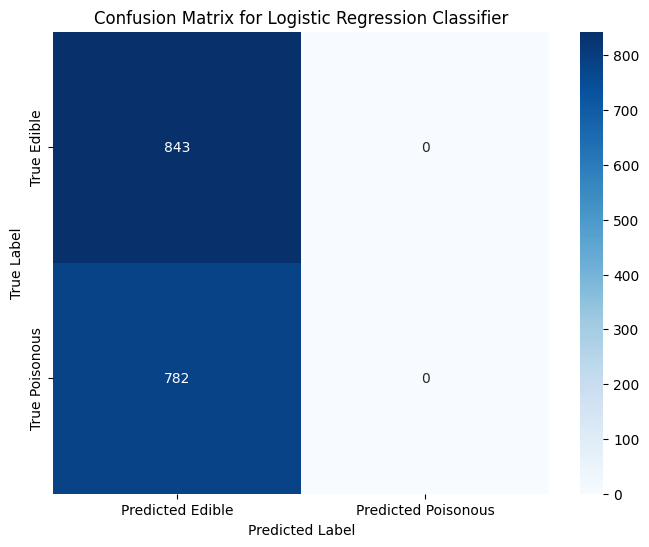

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Edible', 'Predicted Poisonous'],
            yticklabels=['True Edible', 'True Poisonous'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

### Reflection 4:
- How well did the model perform?
  - Really poorly.
- Any surprises in the results?
  - I didn't expect logistic regression to be the best approach since the numbers are just codes rather than actual values, but I was surprised that it settled on just calling everything edible!

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)
### 5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.

In [38]:
# Initialize the Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
decision_tree_model.fit(X_train, y_train)

print("Decision Tree model training complete.")

# Make predictions on the test set with the Decision Tree model
y_pred_dt = decision_tree_model.predict(X_test)

print("\n--- Decision Tree Classifier Performance ---")

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (Decision Tree): {accuracy_dt:.4f}")

# Calculate precision
precision_dt = precision_score(y_test, y_pred_dt)
print(f"Precision (Decision Tree): {precision_dt:.4f}")

# Calculate recall
recall_dt = recall_score(y_test, y_pred_dt)
print(f"Recall (Decision Tree): {recall_dt:.4f}")

# Calculate F1-score
f1_dt = f1_score(y_test, y_pred_dt)
print(f"F1-Score (Decision Tree): {f1_dt:.4f}")

# Calculate Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix (Decision Tree):")
print(conf_matrix_dt)

Decision Tree model training complete.

--- Decision Tree Classifier Performance ---
Accuracy (Decision Tree): 0.9951
Precision (Decision Tree): 0.9987
Recall (Decision Tree): 0.9910
F1-Score (Decision Tree): 0.9949

Confusion Matrix (Decision Tree):
[[842   1]
 [  7 775]]


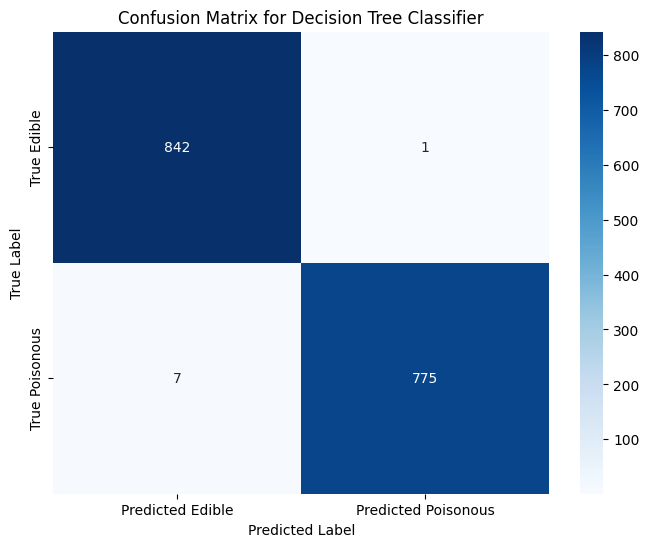

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Edible', 'Predicted Poisonous'],
            yticklabels=['True Edible', 'True Poisonous'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

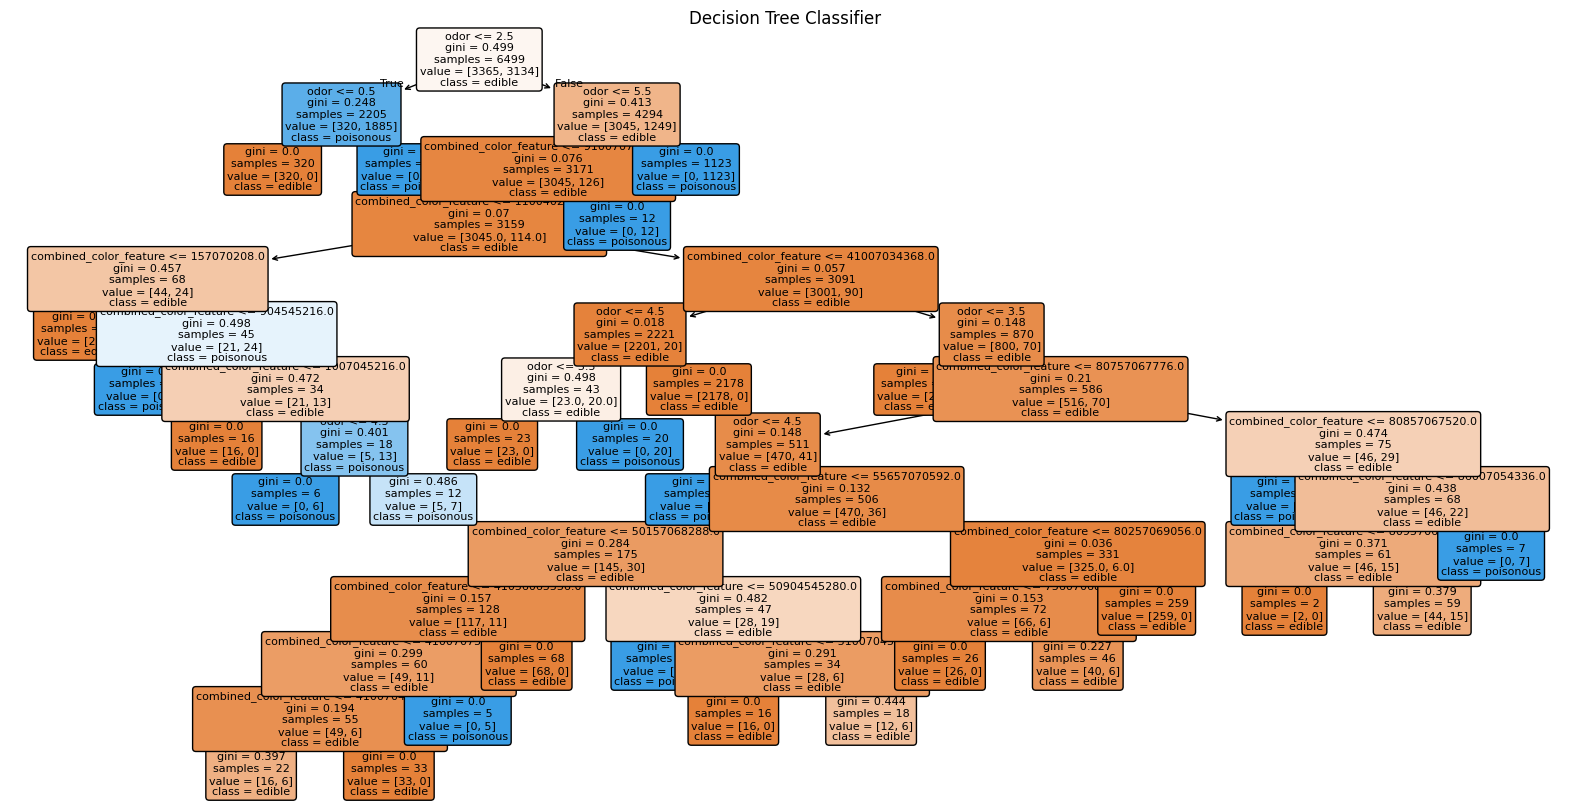

In [40]:
# Visualize the Decision Tree logic
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns.tolist(), class_names=['edible', 'poisonous'], rounded=True, fontsize=8)
plt.title("Decision Tree Classifier")
plt.savefig('decision_tree.png') # Save the plot to a file
plt.show()

### 5.2 Compare performance of all models across the same performance metrics.

In [41]:
# Create a dictionary to store the metrics
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy, accuracy_dt],
    'Precision': [precision, precision_dt],
    'Recall': [recall, recall_dt],
    'F1-Score': [f1, f1_dt]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

print("\n--- Model Performance Comparison ---")
display(metrics_df)



--- Model Performance Comparison ---


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.518769,0.000000,0.000000,0.000000
1,Decision Tree,0.995077,0.998711,0.991049,0.994865


### Reflection 5:
- Which model performed better?
  - The decision tree model pefrormed far better!
- Why might one classifier be more effective in this specific case?
  - The numbers being encoding rather than actual values made regression a poor fit (although even poorer than I expected). A decision tree was able to break down the encoding logic cleanly though.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize findings.
### 6.2 Discuss challenges faced.
The primary challenge I faced was technical, but that helped me learn new tools moving from VS Code to Colab for python notebook work.

### 6.3 If you had more time, what would you try next?
First, I would take the time to resolve my technical issues through more thorough troubleshooting. I would also like to try this with a personal dataset that doesn't start as cleanly. I'd also like to look at a cluster analysis approach to get some experience with non-labeled data.  
If I were going to use this model, I would also want to tune to remove edible predictions of poisonous mushrooms. Even if it hurts overall accuracy, it's better to avoid an edible mushroom than to eat a poisonous one.
### Reflection 6:
- What did you learn from this project?
  - I learned that building an effective predictive model can be easier than I expected. I see getting familiar with the different approcaches available and understanding their strengths and weaknesses as key to knowing which tool to reach for in real-world situations.
